In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Load metadata

In [46]:
df_meta = pd.read_csv("../metadata/dataset_metadata_supp_table3.tsv",sep="\t")
df_meta=df_meta[(df_meta["is_selected"]==True)]    
df_pcawg=pd.read_csv("../results/data/processed_pcawg_escape_info.tsv.gz",sep="\t")
x=df_pcawg["cancer_type"].value_counts()
ttypes_pcawg=x[x>=10].index
df_pcawg =  df_pcawg[df_pcawg["cancer_type"].isin(ttypes_pcawg)]
df_hmf=pd.read_csv("../results/data/processed_hmf_escape_info.tsv.gz",sep="\t")
x=df_hmf["cancer_type"].value_counts()
ttypes_hmf=x[x>=10].index
df_hmf =  df_hmf[df_hmf["cancer_type"].isin(ttypes_hmf)]


/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (16,17,19,20,142) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Read LOH from https://www.biorxiv.org/content/10.1101/2022.06.17.496528v1 (Fig. 1e), Supp. Table 2

In [2]:
!cp /home/fran/Documents/cuppen/HPC/tunnel/cuppen//projects/P0025_PCAWG_HMF/passengers/processed/aneuploidy/04_rm_no_consent/LOH.tsv ../external_data/

In [5]:
loh = pd.read_csv("../external_data/LOH.tsv",sep="\t").rename(columns={"LOH":"loh_rate"})
loh["sample_id"] = loh["sample_ID"].str[:-1]
loh["loh_rate"] = loh["loh_rate"] / 100.0

### PCAWG

In [35]:
df_pcawg = df_pcawg.merge(loh)
df_pcawg["loh_focal_hla"] = df_pcawg["loh_lilac"] & df_pcawg["loh_focal"].str.contains("HLA")
df_pcawg["loh_hfocal_hla"] = df_pcawg["loh_lilac"] & df_pcawg["loh_hfocal"].str.contains("HLA")

In [36]:
background_rates=df_pcawg.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop=("loh_rate",np.nanmean),std_prop=("loh_rate",np.nanstd)).reset_index()
background_rates_lohhla=df_pcawg.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop_hla=("loh_lilac",np.nanmean),std_prop_hla=("loh_lilac",np.nanstd)).reset_index()
background_rates_lohhla_focal=df_pcawg.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop_hla=("loh_focal_hla",np.nanmean),std_prop_hla=("loh_focal_hla",np.nanstd)).reset_index()
background_rates_lohhla_hfocal=df_pcawg.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop_hla=("loh_hfocal_hla",np.nanmean),std_prop_hla=("loh_hfocal_hla",np.nanstd)).reset_index()


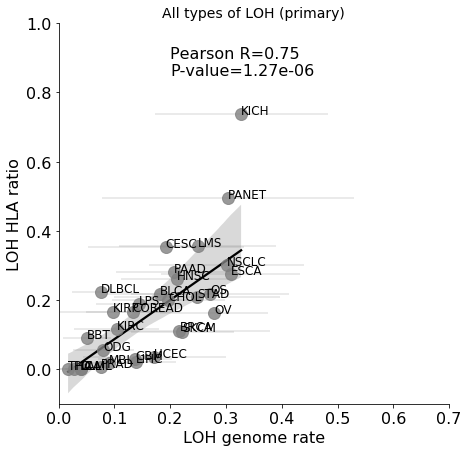

In [38]:
fig,ax=plt.subplots(figsize=(7,7))
s= background_rates.merge(background_rates_lohhla)
ax.errorbar(y=s["mean_prop_hla"],x=s["mean_prop"],xerr=s["std_prop"],fmt="o",color="grey",markersize=12,alpha=0.8,elinewidth=0.4)
sns.regplot(data=s,x="mean_prop",y="mean_prop_hla",scatter=False,robust=True,color="black")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(-0.1,1.0)
ax.set_xlim(-0.0,0.7)

ax.set_title("All types of LOH (primary)",fontsize=14)
for i,r in s.iterrows():
    ax.annotate(xy=(r["mean_prop"],r["mean_prop_hla"]),s=r["cancer_type_code"],fontsize=12)
    

ax.set_ylabel("LOH HLA ratio",fontsize=16)
ax.set_xlabel("LOH genome rate",fontsize=16)
r,p=scipy.stats.pearsonr(s["mean_prop"],s["mean_prop_hla"])
ax.annotate(xy=(0.2,0.9),s="Pearson R={:.2f}".format(r),fontsize=16)
ax.annotate(xy=(0.2,0.85),s="P-value={:.2e}".format(p),fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig(f'../results/figures/figure3/loh_background_rates_primary.pdf', dpi=800,bbox_inches="tight")

# Hartwig

In [54]:
loh = pd.read_csv("/home/fran/Documents/cuppen/HPC/tunnel/cuppen//projects/P0025_PCAWG_HMF/passengers/processed/aneuploidy/04_rm_no_consent/LOH.tsv",sep="\t").rename(columns={"LOH":"loh_rate","sample_ID":"sample_id"})
loh["loh_rate"] = loh["loh_rate"] / 100.0

In [55]:
df_hmf = df_hmf.merge(loh)
df_hmf["loh_focal_hla"] = df_hmf["loh_lilac"] & df_hmf["loh_focal"].str.contains("HLA")
df_hmf["loh_hfocal_hla"] = df_hmf["loh_lilac"] & df_hmf["loh_hfocal"].str.contains("HLA")

In [56]:
background_rates=df_hmf.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop=("loh_rate",np.nanmean),std_prop=("loh_rate",np.nanstd)).reset_index()
background_rates_lohhla=df_hmf.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop_hla=("loh_lilac",np.nanmean),std_prop_hla=("loh_lilac",np.nanstd)).reset_index()
background_rates_lohhla_focal=df_hmf.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop_hla=("loh_focal_hla",np.nanmean),std_prop_hla=("loh_focal_hla",np.nanstd)).reset_index()
background_rates_lohhla_hfocal=df_hmf.groupby(["cancer_type_code","cancer_type"]).agg(mean_prop_hla=("loh_hfocal_hla",np.nanmean),std_prop_hla=("loh_hfocal_hla",np.nanstd)).reset_index()


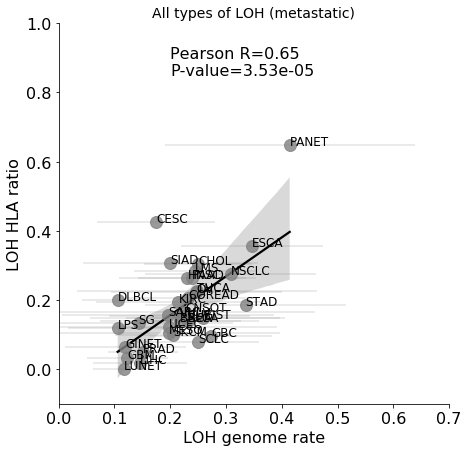

In [57]:

fig,ax=plt.subplots(figsize=(7,7))
s= background_rates.merge(background_rates_lohhla)
ax.errorbar(y=s["mean_prop_hla"],x=s["mean_prop"],xerr=s["std_prop"],fmt="o",color="grey",markersize=12,alpha=0.8,elinewidth=0.4)
sns.regplot(data=s,x="mean_prop",y="mean_prop_hla",scatter=False,robust=True,color="black")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(-0.1,1.0)
ax.set_xlim(-0.0,0.7)

ax.set_title("All types of LOH (metastatic)",fontsize=14)
for i,r in s.iterrows():
    ax.annotate(xy=(r["mean_prop"],r["mean_prop_hla"]),s=r["cancer_type_code"],fontsize=12)
    

ax.set_ylabel("LOH HLA ratio",fontsize=16)
ax.set_xlabel("LOH genome rate",fontsize=16)
r,p=scipy.stats.pearsonr(s["mean_prop"],s["mean_prop_hla"])
ax.annotate(xy=(0.2,0.9),s="Pearson R={:.2f}".format(r),fontsize=16)
ax.annotate(xy=(0.2,0.85),s="P-value={:.2e}".format(p),fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig(f'../results/figures/figure3/loh_background_rates_met.pdf', dpi=800,bbox_inches="tight")